<a href="https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/AutoViML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install autoviml

In [0]:
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd

In [0]:
BASE_DIR = '/tmp'
OUTPUT_FILE = os.path.join(BASE_DIR, 'churn_data.csv')

In [0]:
churn_data=urllib.request.urlretrieve('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv', OUTPUT_FILE)

In [0]:
churn_df = pd.read_csv(OUTPUT_FILE)

In [6]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
size = int(0.7*churn_df.shape[0])
train_df = churn_df[:size]
test_df = churn_df[size:]

In [0]:
from autoviml.Auto_ViML import Auto_ViML

In [0]:
target='Churn'

Train (Size: 4930,21) has Single_Label with target: ['Churn']
"
 ################### Binary-Class ##################### " 
Shuffling the data set before training
 Class  -> Counts -> Percent
   Yes:    1289  ->   26.1%
    No:    3641  ->   73.9%
Selecting 2-Class Classifier...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This will take time...
String or Multi Class target: Churn transformed as follows: {'No': 0, 'Yes': 1}
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  10
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  5
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    20 Predictors classified...
        This does not include the Target column

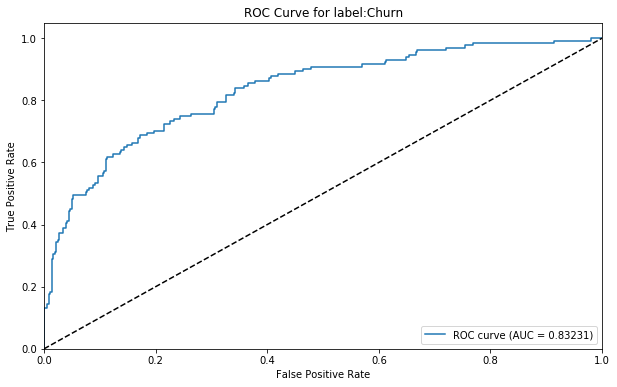

Average precision-recall score: 0.80
Macro F1 score, averaged over all classes: 0.72


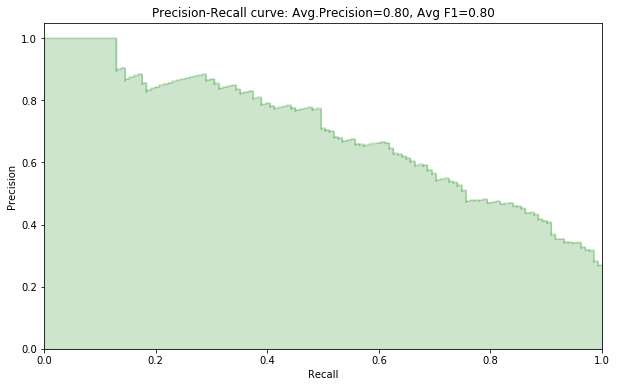

After multiple models, Ensemble Model Results:
    Balanced Accuracy Score = 82.556%
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       362
           1       0.69      0.62      0.65       131

    accuracy                           0.83       493
   macro avg       0.78      0.76      0.77       493
weighted avg       0.82      0.83      0.82       493

[[326  36]
 [ 50  81]]

Ensembling Models is better than Single Model for this data set.


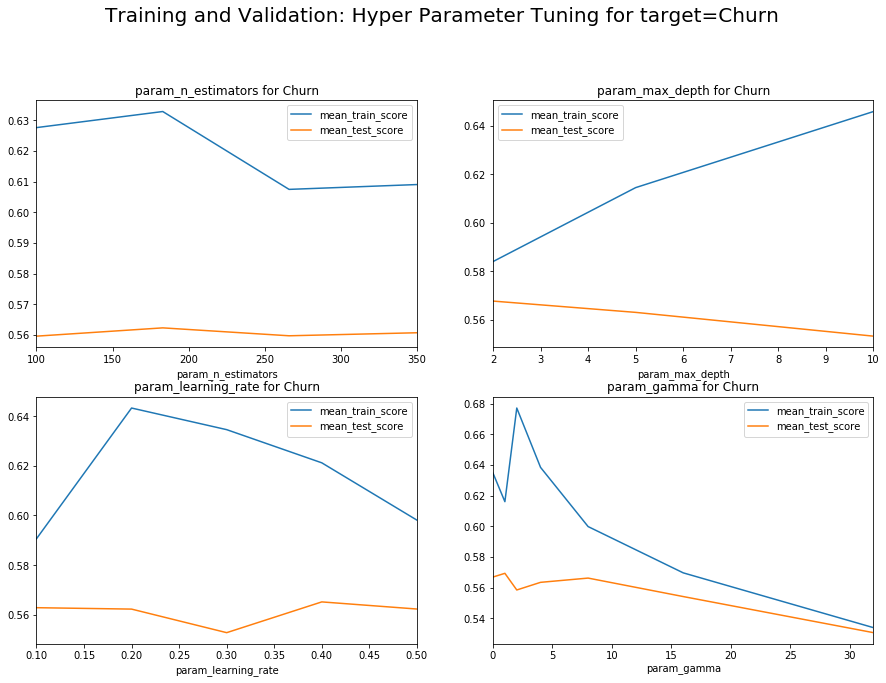

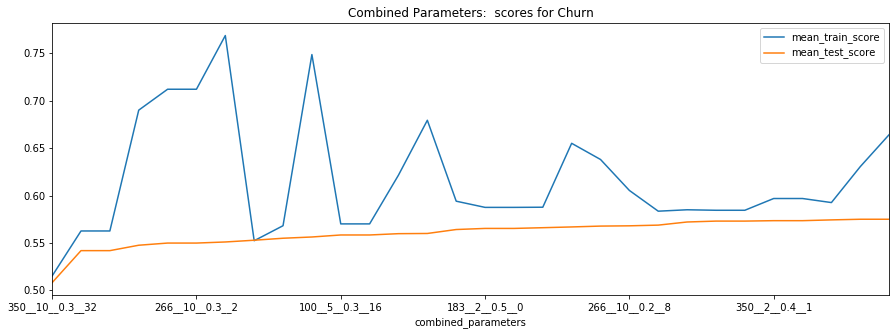

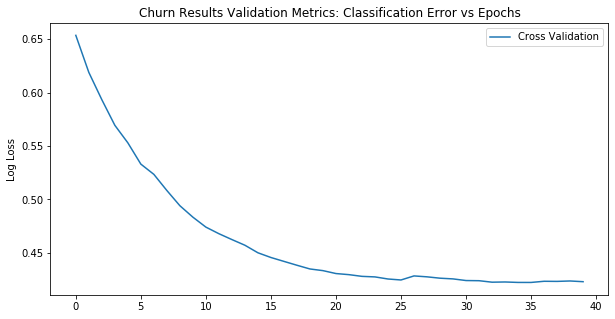

    Time taken for this Target (in seconds) = 25
Plotting Feature Importances to explain the output of model

###################################################################################
Training model on complete Train data and Predicting using give Test Data...
Leaving Top 1 continuous variables as is...
    No Entropy Binning specified
Number of numeric variables = 1
    No variables were removed since no highly correlated variables found in data
    Adding 18 categorical variables to reduced numeric variables  of 1
Selected No. of variables = 19 
Finding Important Features...
        in 19 variables
        in 15 variables
        in 11 variables
        in 7 variables
        in 3 variables
    Found 19 important features

Imbalanced Class Training using Majority Class Downsampling method...
Rare Class = 1
    Pct of Rare Class in data = 26.26%
    Number of iterations for training =  1
  Rare Class Batch Size = 1165
  Majority Class Batch Size = 3272
     1. Training Batch

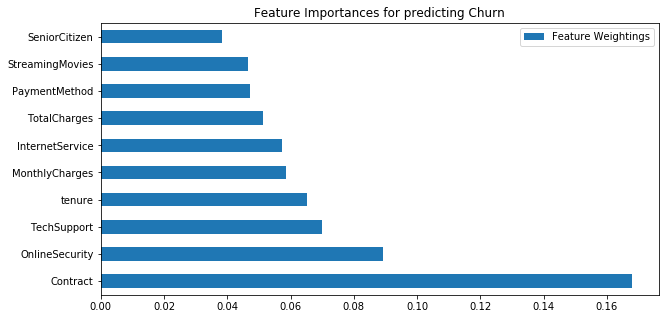

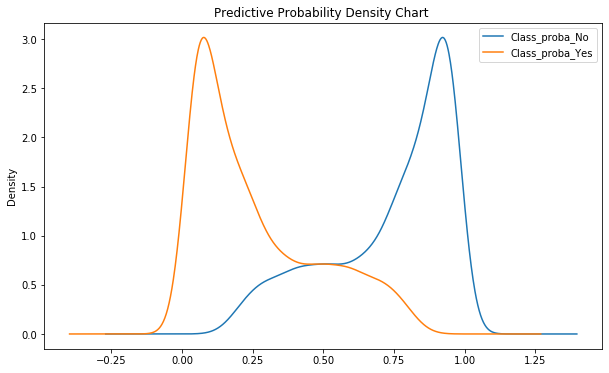

In [10]:
model, features, trainm, testm = Auto_ViML(train_df, target, test_df, sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='RS',feature_reduction=True,
                                    Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=True, 
                                    verbose=2)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
testm

,Contract,TechSupport,OnlineSecurity,tenure,InternetService,PaymentMethod,PaperlessBilling,DeviceProtection,MonthlyCharges,MultipleLines,OnlineBackup,Dependents,StreamingTV,Partner,SeniorCitizen,TotalCharges,StreamingMovies,gender,PhoneService,Class_proba_No,Class_proba_Yes,Churn_Logistic Regression_predictions,Churn_Linear Discriminant_predictions,Churn_Naive Bayes_predictions,Churn_Bagging_predictions,Churn_XGBoost_predictions,Churn_Ensembled_predictions
4930,0,0,0,1,0,3,0,0,0.261692,1,1,0,0,1,0,3638,0,0,1,0.532735,0.467265,No,No,Yes,No,Yes,No
4931,0,1,0,15,1,0,0,1,0.847761,2,1,0,1,0,0,4654,1,1,1,0.295689,0.704311,Yes,Yes,Yes,Yes,Yes,Yes
4932,1,0,1,27,1,3,0,0,0.620896,1,0,1,0,0,0,4655,0,1,1,0.847506,0.152494,No,No,No,No,No,No
4933,0,0,1,4,0,1,0,1,0.387562,0,0,1,1,1,0,4656,1,0,0,0.724096,0.275904,No,No,No,No,No,No
4934,2,0,1,72,1,0,0,1,0.920398,2,0,0,1,0,0,4657,1,0,1,0.929394,0.070606,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,24,0,1,0,1,0.662189,2,1,1,1,0,0,6526,1,1,1,0.827409,0.172591,No,No,No,No,No,No
7039,1,0,0,72,1,3,0,1,0.845274,2,0,1,1,0,0,6527,1,0,1,0.843781,0.156219,No,No,No,No,No,No
7040,0,0,1,11,0,0,0,0,0.112935,0,1,1,0,0,0,6528,0,0,0,0.713332,0.286668,No,No,Yes,No,No,No
7041,0,0,0,4,1,1,0,0,0.558706,2,1,0,0,0,1,6529,0,1,1,0.421668,0.578332,Yes,Yes,Yes,Yes,Yes,Yes


In [13]:
 print(confusion_matrix(test_df[target].values,testm['Churn_XGBoost_predictions'].values))

[[1311  222]
 [ 233  347]]


In [14]:
 print(confusion_matrix(test_df[target].values,testm['Churn_Logistic Regression_predictions'].values))

[[1410  123]
 [ 302  278]]


In [15]:
 print(confusion_matrix(test_df[target].values,testm['Churn_Ensembled_predictions'].values))

[[1375  158]
 [ 268  312]]


In [16]:
print(classification_report(test_df[target].values,testm['Churn_XGBoost_predictions'].values))

              precision    recall  f1-score   support

          No       0.85      0.86      0.85      1533
         Yes       0.61      0.60      0.60       580

    accuracy                           0.78      2113
   macro avg       0.73      0.73      0.73      2113
weighted avg       0.78      0.78      0.78      2113



In [17]:
print(classification_report(test_df[target].values,testm['Churn_Ensembled_predictions'].values))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1533
         Yes       0.66      0.54      0.59       580

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

